## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the dataset

In [2]:
dataset = pd.read_csv("../data/housing.csv")
dataset.tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20630,-121.32,39.29,11.0,2640.0,505.0,1257.0,445.0,3.5673,112000.0,INLAND
20631,-121.40,39.33,15.0,2655.0,493.0,1200.0,432.0,3.5179,107200.0,INLAND
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


### Analyze the data

In [3]:
dataset.info()
dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
dataset.duplicated().sum()

np.int64(0)

* There are no duplicated raws
* There are 207 missing data about <b>total bedroom</b>

In [5]:
dataset["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


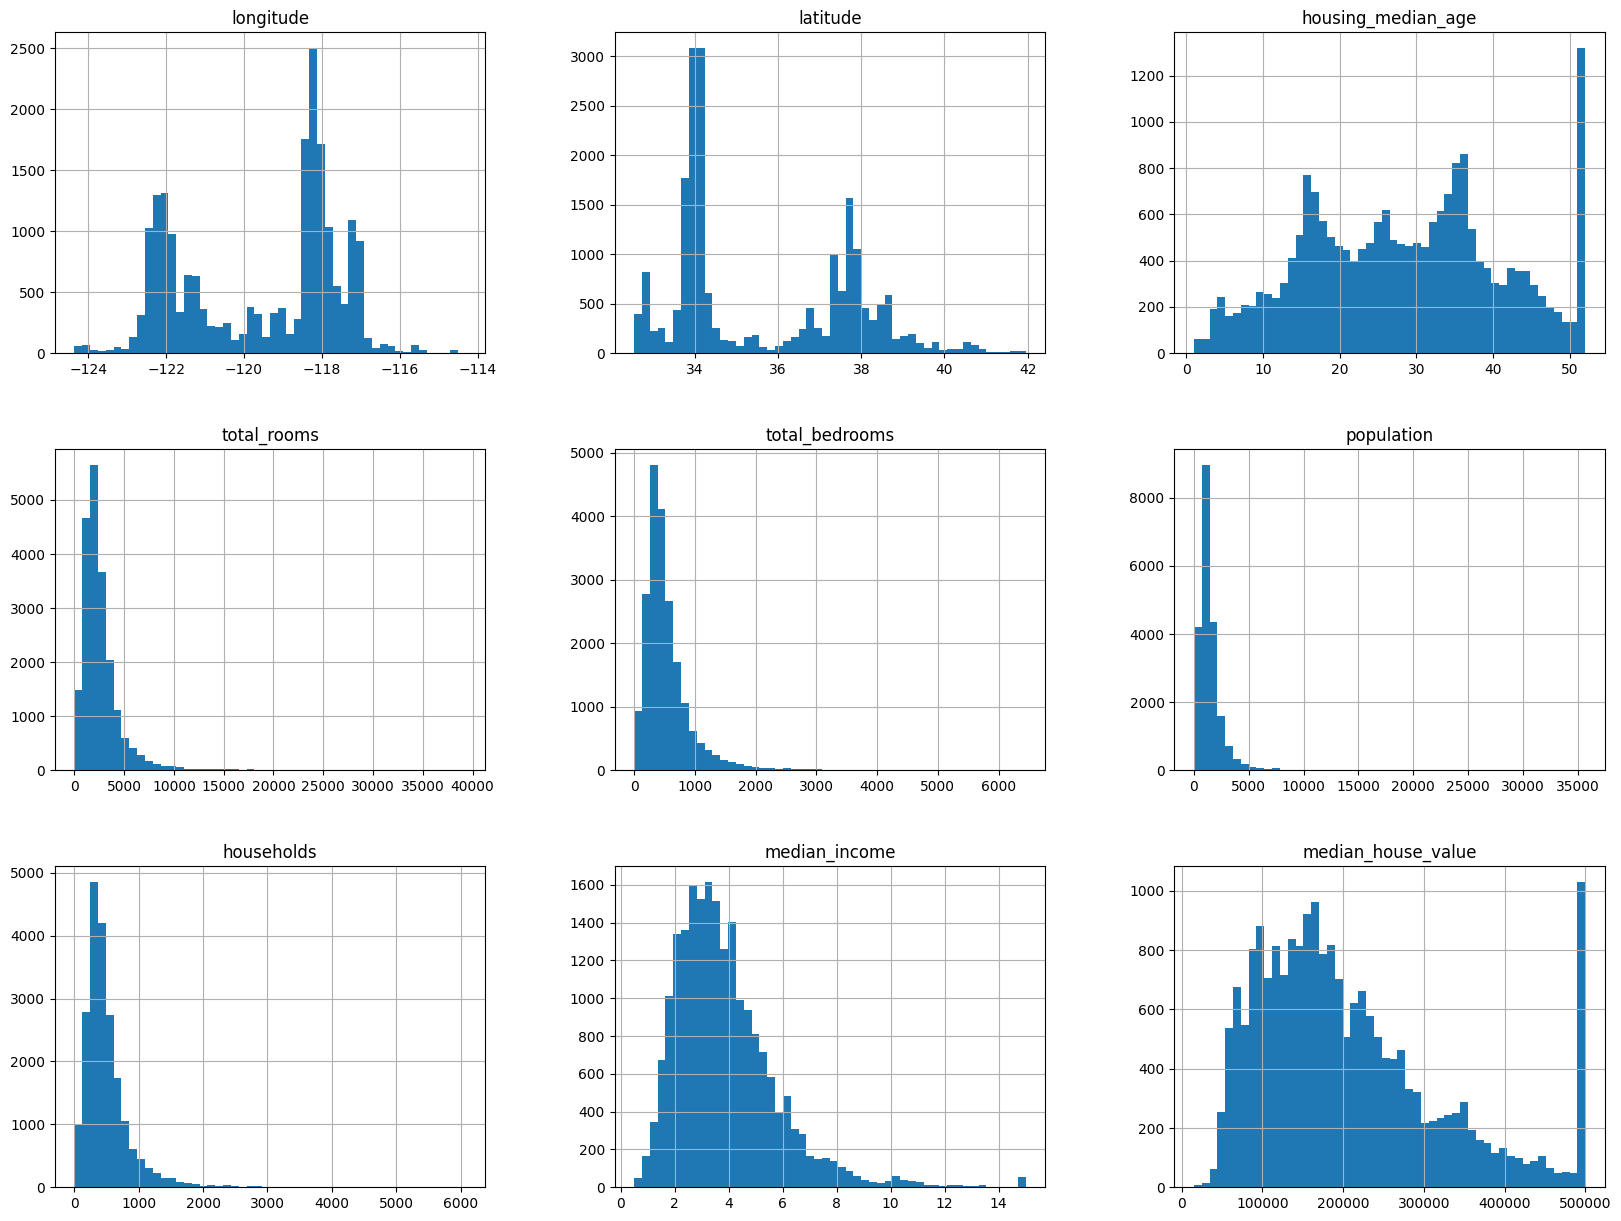

In [7]:
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

### Problems with the data, based on plots analysis:
- <b>median_income</b>: based on previous information from the database creators: data was scaled (eg. 4 instead of 40 000 USD/year) and limited (capped) to 15 at the upper limit and 0.5 at the lower one;
- also capped: <b>housing_median_age</b> & <b>median_housing_value</b> (<u>Attention:</u> in this case, the ML algorithm may learn for example that prices are no more than 500 000 USD!!!);
- very different ranges of values for the dataframe attributes (for each column);
- many histograms: <i>tail-heavy</i> (extended to the right in relation to the median value), instead of following a symmetric, normal distribution.

## Create a train set and a test set

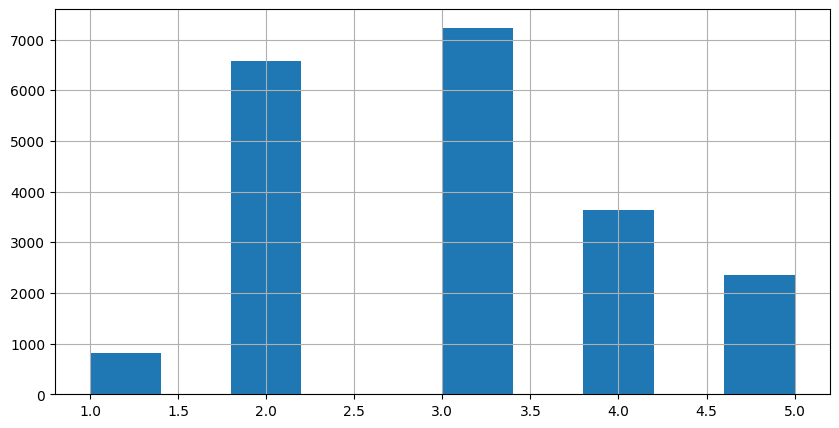

income_category
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64


In [8]:
# Add a new column to the dataset (income_category) based on the median income

dataset["income_category"] = pd.cut(dataset["median_income"],
                                    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                    labels=[1, 2, 3, 4, 5])

dataset["income_category"].hist(figsize=(10, 5))
plt.show()
print(dataset["income_category"].value_counts())

In [9]:
# Split the dataframe into train and test sets, using the above categories for stratificatied sampling
from sklearn.model_selection import StratifiedShuffleSplit

split_indices = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

print(split_indices.split(dataset, dataset["income_category"]))

for train_index, test_index in split_indices.split(dataset, dataset["income_category"]):
    train_set = dataset.loc[train_index]
    test_set = dataset.loc[test_index]

train_set.tail(10)

<generator object BaseShuffleSplit.split at 0x750943d34840>


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
12396,-116.29,33.67,12.0,5048.0,842.0,883.0,391.0,5.6918,231300.0,INLAND,4
16476,-121.27,38.13,35.0,2607.0,685.0,2016.0,618.0,1.7500,82900.0,INLAND,2
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,3
6980,-118.01,33.97,36.0,1451.0,224.0,608.0,246.0,6.0648,290800.0,<1H OCEAN,5
5206,-118.28,33.93,41.0,936.0,257.0,913.0,226.0,2.0313,122600.0,<1H OCEAN,2
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3
19773,-122.14,39.97,27.0,1079.0,222.0,625.0,197.0,3.1319,62700.0,INLAND,3


In [10]:
# Check the proportions of each category in the entire DF (before split):

print(dataset["income_category"].value_counts()/len(dataset)*100)  # same % in the entire set
print()
print(train_set["income_category"].value_counts()/len(train_set)*100)
print()
print(test_set["income_category"].value_counts()/len(test_set)*100)

income_category
3    35.058140
2    31.884690
4    17.630814
5    11.443798
1     3.982558
Name: count, dtype: float64

income_category
3    35.059351
2    31.885901
4    17.629603
5    11.446221
1     3.978924
Name: count, dtype: float64

income_category
3    35.053295
2    31.879845
4    17.635659
5    11.434109
1     3.997093
Name: count, dtype: float64


In [11]:
# Drop column "income_category" from the train and test sets

train_set.drop("income_category", axis=1, inplace=True)
test_set.drop("income_category", axis=1, inplace=True)

test_set.tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5353,-118.40,34.03,36.0,1831.0,296.0,871.0,269.0,8.1484,500001.0,<1H OCEAN
3208,-119.63,36.33,14.0,2928.0,600.0,1633.0,559.0,1.8385,67500.0,INLAND
5568,-118.29,33.88,32.0,2307.0,493.0,1754.0,528.0,4.3170,232800.0,<1H OCEAN
16838,-122.48,37.57,34.0,4648.0,806.0,2282.0,814.0,4.5556,249000.0,NEAR OCEAN
19769,-122.11,39.82,27.0,1065.0,214.0,508.0,198.0,2.6250,91700.0,INLAND
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN
3965,-118.56,34.19,36.0,2600.0,441.0,1246.0,426.0,4.1111,215600.0,<1H OCEAN


## Visualize the data to find more information

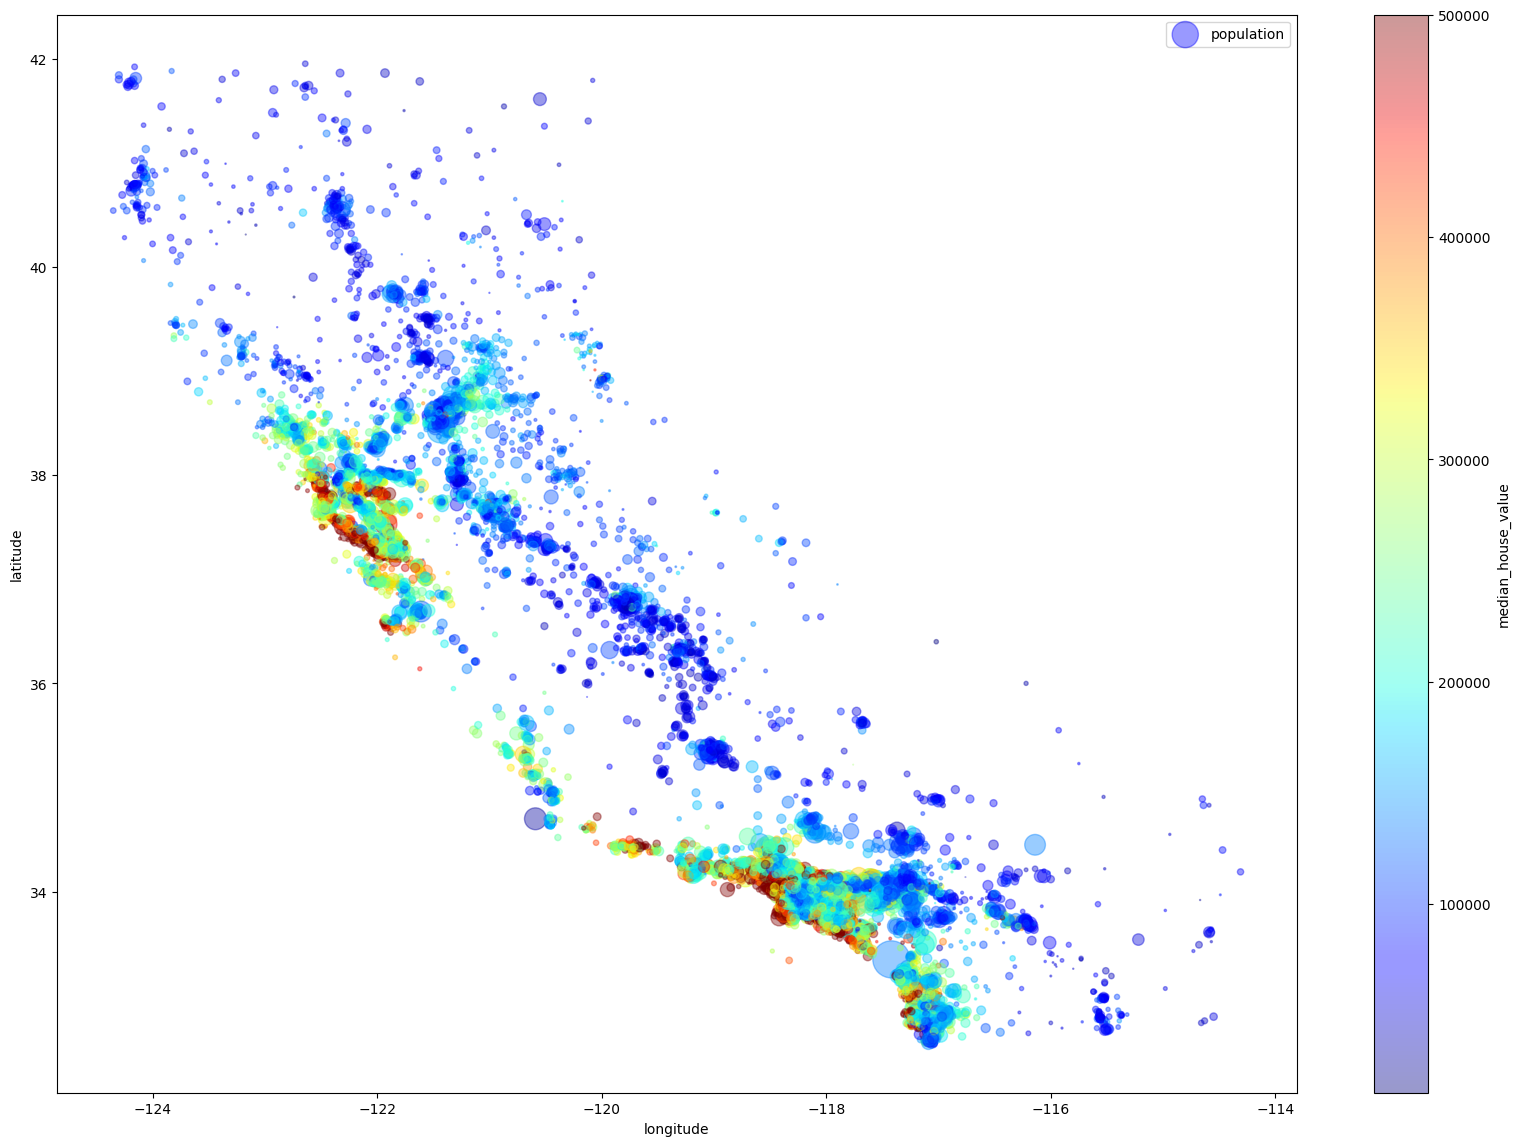

In [12]:
housing = train_set.copy() # Create a copy of the training set
housing.plot(kind="scatter",
             x="longitude", y="latitude",
             figsize=(20, 14),
             alpha=0.4,
             s=housing["population"]/50, 
             label="population",         
             c="median_house_value",     
             cmap=plt.get_cmap("jet"),    
             colorbar=True)

plt.legend()
plt.show()

- Housing values depend on the location (higher prices close to the ocean);

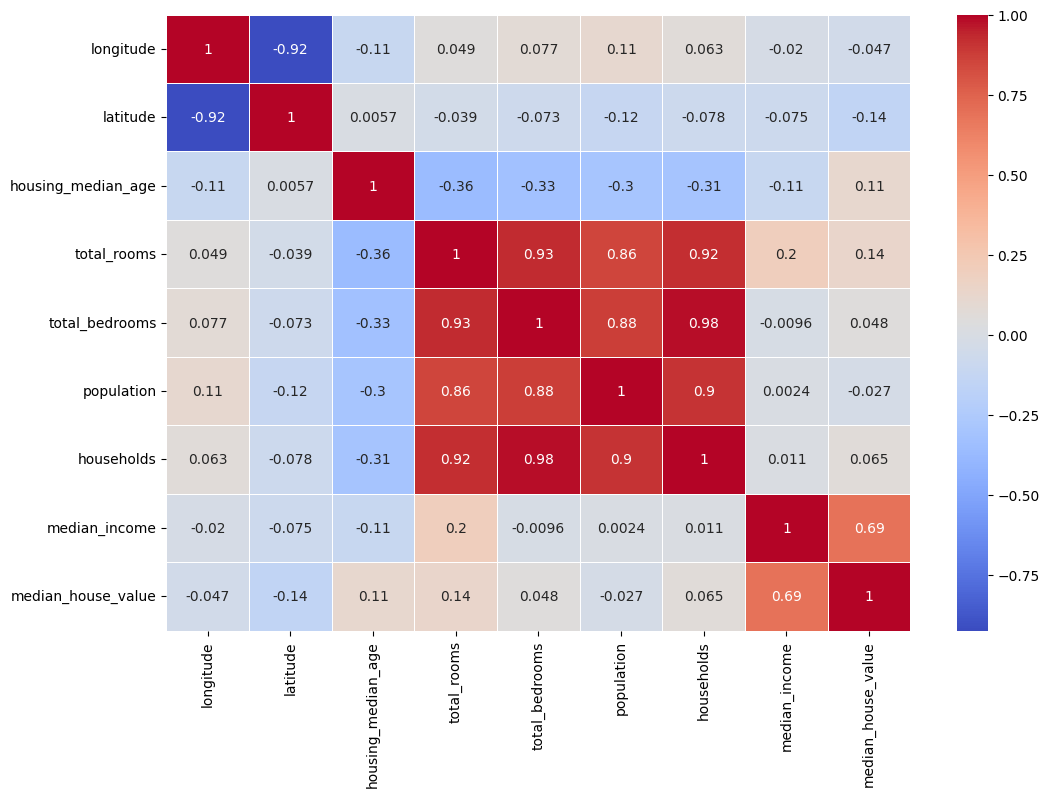

In [13]:
corr_matrix = housing.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

#### Create these new potentially useful attributes (<font color="blue">rooms_per_household, bedrooms_per_room, population_per_household</font>) and check how they correlate with *median_house_value*:

In [14]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]

housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]

housing["population_per_household"] = housing["population"]/housing["households"]

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


In [15]:
# Check the correlation coefficients again:

corr_matrix = housing.corr(numeric_only=True)
print(corr_matrix["median_house_value"].sort_values(ascending = False))

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64


#### Some conclusions:
- ***bedrooms_per_room*** is much more correlated with ***median_house_value*** than ***total_rooms*** or ***total_bedrooms***;
- houses with a lower no of bedrooms per room - more expensive (negative correlation);
- ***rooms_per_household*** - slightly more informative than total number of rooms in the district (larger houses are more expensive);
- ***population_per_household*** - lower correlation than total population per district.

## Prepare data for ML Algorithms

### Create a new fresh housing dataset without the newly added columns.
Median house value will be separate dataframe

In [16]:
housing_features = train_set.drop("median_house_value", axis=1)
housing_features.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
1481,-122.04,37.96,28.0,1207.0,252.0,724.0,252.0,3.6964,NEAR BAY
18125,-122.03,37.33,23.0,4221.0,671.0,1782.0,641.0,7.4863,<1H OCEAN
5830,-118.31,34.20,36.0,1692.0,263.0,778.0,278.0,5.0865,<1H OCEAN
17989,-121.95,37.27,17.0,1330.0,271.0,408.0,258.0,1.7171,<1H OCEAN
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,<1H OCEAN


In [17]:
housing_labels = train_set["median_house_value"].copy()
housing_labels.head(10)

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
1481     165700.0
18125    412300.0
5830     349600.0
17989    181300.0
4861     500001.0
Name: median_house_value, dtype: float64

### Replacing the missing values in total_bedrooms with the median number of bedrooms

In [18]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# Create a copy of the DF without the text column (SimpleImputer doesn't work on text values):
housing_num_features = housing_features.drop("ocean_proximity", axis=1)

imputer.fit(housing_num_features)
X = imputer.transform(housing_num_features)

housing_tr = pd.DataFrame(X, columns=housing_num_features.columns, index=housing_num_features.index)

print(imputer.statistics_)
print(housing_num_features.columns)
housing_tr


[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


### Convert the ocean_proximity attribute to a dummy attribute(one-hot encoding)

In [19]:
housing_cat = housing_features[["ocean_proximity"]]

print(housing_cat.shape)
housing_cat.head(10)


(16512, 1)


,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [20]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

# To convert a sparse matrix to a normal aray:
print('Sparse matrix converted to a normal array:')
print(housing_cat_1hot.toarray()[:10], '\n')

print('Encoded categories:')
print(cat_encoder.categories_) # List of categories

Sparse matrix converted to a normal array:
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]] 

Encoded categories:
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


## Feature scaling

* Before <b>using scaling</b>, we will create a transformer class for all previous attributes discussed earlier; the class will add 3 more attributes: <i>rooms_per_household, population_per_hosehold, bedrooms_per_room</i><br><br>
- will have one hyperparameter: ***add_bedrooms_per_room***. Two combinations are allowed (True or False), to test if this attribute improves or not the accuracy of the result.

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
                                         
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6  # column indices

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):   
    def __init__(self, add_bedrooms_per_room=True):             
        self.add_bedrooms_per_room = add_bedrooms_per_room        
    
    def fit(self, X, y=None):
        return self  
        
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix] 
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            
            # Concatenate new columns to the right side of matrix X, using the c_ function: 
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


# Test how the class performs:
attr_adder = CombinedAttributesAdder()

housing_extra_attribs = attr_adder.transform(housing_features.values) 
                                                    
print(housing_extra_attribs[:, -4::]) # Check the last 4 columns

[['INLAND' 5.485835694050992 3.168555240793201 0.20578363026077975]
 ['NEAR OCEAN' 6.927083333333333 2.6236979166666665 0.16071428571428573]
 ['INLAND' 5.3933333333333335 2.223333333333333 0.1915945611866502]
 ...
 ['<1H OCEAN' 4.1104651162790695 2.6627906976744184 0.2347949080622348]
 ['<1H OCEAN' 6.297405189620759 2.411177644710579 0.1838351822503962]
 ['INLAND' 5.477157360406092 3.1725888324873095 0.2057460611677479]]


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num_features)

print(housing_num_features.head(), '\n')                          
print(housing_num_tr[:6, :].round(2))

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income  
12655      2237.0       706.0         2.1736  
15502      2015.0       768.0         6.3373  
2908        667.0       300.0         2.8750  
14053       898.0       483.0         2.2264  
20496      1837.0       580.0         4.4964   

[[-0.94  1.35  0.03  0.58  0.64  0.73  0.56 -0.89  0.02  0.01 -0.12]
 [ 1.17 -1.19 -1.72  1.26  0.78  0.53  0.72  1.29  0.57 -0.04 -0.81]
 [ 0.27 -0.13  1.22 -0.47 -0.55 -0.67 -0.52 -0.53 -0.02 -0.08 -0.34]
 [ 1.22 -1.35 -0.37 -0.35 -0.04 -0

In [23]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num_features)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

# Prepare the training model (housing) for final training:
housing_features_prepared = full_pipeline.fit_transform(housing_features)

np.set_printoptions(edgeitems=10,  
                    linewidth=600,
                    precision=3,    
                    suppress=True)  

print(housing_features_prepared[:6, :])

[[-0.941  1.347  0.028  0.585  0.64   0.733  0.556 -0.894  0.017  0.006 -0.121  0.     1.     0.     0.     0.   ]
 [ 1.172 -1.192 -1.722  1.261  0.782  0.534  0.721  1.292  0.569 -0.041 -0.811  0.     0.     0.     0.     1.   ]
 [ 0.268 -0.126  1.22  -0.47  -0.545 -0.675 -0.524 -0.525 -0.018 -0.075 -0.338  0.     1.     0.     0.     0.   ]
 [ 1.222 -1.351 -0.37  -0.349 -0.036 -0.468 -0.037 -0.866 -0.595 -0.107  0.961  0.     0.     0.     0.     1.   ]
 [ 0.437 -0.636 -0.131  0.427  0.273  0.374  0.221  0.326  0.251  0.006 -0.475  1.     0.     0.     0.     0.   ]
 [-1.231  1.085 -0.052 -0.662 -0.686 -0.624 -0.652 -0.094 -0.249 -0.019 -0.075  0.     0.     0.     1.     0.   ]]


In [24]:
#Reset printoptions to default values:

np.set_printoptions(edgeitems=3, infstr='inf', linewidth=75, nanstr='nan', precision=8,
                    suppress=False, threshold=1000, formatter=None)

### <font color='blue'>housing_features_prepared</font> - the final matrix to be used for training!

## Training Models

### Method 1: - simple training

In [25]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_features_prepared, housing_labels)

LinearRegression()

In [26]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_features_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)

lin_rmse = np.sqrt(lin_mse)
print(f"[Method 1] Mean Square Error: {lin_rmse} (using Linear Regression)")

[Method 1] Mean Square Error: 68627.87390018745 (using Linear Regression)


In [27]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_features_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_features_prepared)

tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(f"[Method 1] Mean Square Error: {tree_rmse} (using Decision Tree)")


[Method 1] Mean Square Error: 0.0 (using Decision Tree)


The error was 0 => the DecissionTreeRegressor model has strongly overfitted the data!<br>Moreover, the model was tested on a subset that was also used for training! Therefore, we cannot estimate the generalization error (the error made by the model for absolutely new data). 

### Method 2: - using K-fold cross-validation algorithm

In [28]:
from sklearn.model_selection import cross_val_score

scoares = cross_val_score(tree_reg,  # use the Decision Tree model 
                          housing_features_prepared, housing_labels,
                          scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scoares)

print(f"Scores: {tree_rmse_scores.round(0)}")

Scores: [72831. 69973. 69529. 72518. 69146. 79095. 68960. 73345. 69826. 71077.]


In [29]:
# Define a function to display errors, their mean and std. deviation:

def display_scores(scores):            
    print("Scores: ", scores.round(0))
    print("Mean of scores: ", scores.mean().round(0))
    print("Scores' std deviation: ", scores.std().round(0))

print("[Method 2] Decision Tree Regressor:")
display_scores(tree_rmse_scores) 

[Method 2] Decision Tree Regressor:
Scores:  [72831. 69973. 69529. 72518. 69146. 79095. 68960. 73345. 69826. 71077.]
Mean of scores:  71630.0
Scores' std deviation:  2914.0


In [30]:
lin_scores = cross_val_score(lin_reg, housing_features_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmses = np.sqrt(-lin_scores)
print("[Method 2] Linear Regression:")
display_scores(lin_rmses)

[Method 2] Linear Regression:
Scores:  [71763. 64115. 67771. 68635. 66846. 72528. 73997. 68802. 66443. 70140.]
Mean of scores:  69104.0
Scores' std deviation:  2880.0


#### Note that:
- Linear regression with cross validation has a score of 69053 (+/-) 2732
- => performs better than Decision Tree (in this example, however)

### Method 3: - Use the more performant <font color='blue'>RandomForestRegressor</font> model, which trains many Decision Trees on random subsets, then averages their predictions.

In [31]:
# Train forest regressor on the entire housing_features_prepared dataset:

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42, n_jobs=-1)
forest_reg.fit(housing_features_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_features_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(f"[Method 3] Mean Square Error: {forest_rmse.round(0)} (using Random Forest)")

[Method 3] Mean Square Error: 18651.0 (using Random Forest)


In [32]:
# Train many forest regressors on random subsets, then predict with each forest reg and average the resuls:

forest_scores = cross_val_score(forest_reg, 
                                housing_features_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
print("[Method  3] Forest Regressor:")
display_scores(forest_rmse_scores)

[Method  3] Forest Regressor:
Scores:  [51560. 48738. 47211. 51875. 47578. 51863. 52746. 50065. 48665. 54056.]
Mean of scores:  50436.0
Scores' std deviation:  2203.0


#### Note that:
- RMSE for Random Forest object trained on the entire housing_prepared dataset is 18603;
- Random Forests model using cross validation has a score of 50182 (+/-) 2097 (much better than training
  a single Decision Tree, which was 71408 (+/-) 2439);
- 18603 is much too low when compared to 50182 => the Random Forest model is still overfitting the training set.


### Find the best values for hyperparameters (Fine-Tune the Model)

### <font color='blue'>GridSearchCV</font>

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_features_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [34]:
# Print the best results of the grid_search object:
print(grid_search.best_estimator_)    

RandomForestRegressor(max_features=8, n_estimators=30, n_jobs=-1,
                      random_state=42)


In [35]:
forest_reg = RandomForestRegressor(max_features=8, 
                                   n_estimators=30, 
                                   random_state=42, 
                                   n_jobs=-1)

forest_scores = cross_val_score(forest_reg,
                                housing_features_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [51195. 48880. 45735. 50639. 47828. 50525. 51030. 49339. 48285. 52328.]
Mean of scores:  49579.0
Scores' std deviation:  1854.0


### <font color='blue'>RandomizedSearchCV</font>

In [36]:
from sklearn.model_selection import RandomizedSearchCV

param_rand_src = [{'bootstrap': [True, False],
                  'n_estimators': list(range(10, 35)),  
                  'max_features': list(range(6 ,10))}] 

rand_src = RandomizedSearchCV(forest_reg, 
                              param_rand_src, 
                              n_iter=50, 
                              cv=5,
                              scoring='neg_mean_squared_error', random_state=42, n_jobs=-1,
                              return_train_score=True)

rand_src.fit(housing_features_prepared, housing_labels)


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_features=8,
                                                   n_estimators=30, n_jobs=-1,
                                                   random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_features': [6, 7, 8, 9],
                                         'n_estimators': [10, 11, 12, 13, 14,
                                                          15, 16, 17, 18, 19,
                                                          20, 21, 22, 23, 24,
                                                          25, 26, 27, 28, 29,
                                                          30, 31, 32, 33,
                                                          34]}],
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [37]:
print(rand_src.best_estimator_)

RandomForestRegressor(bootstrap=False, max_features=7, n_estimators=33,
                      n_jobs=-1, random_state=42)


In [38]:
forest_reg = RandomForestRegressor(max_features=7,
                                   bootstrap=False,
                                   n_estimators=33,
                                   n_jobs=-1,
                                   random_state=42)

forest_scores = cross_val_score(forest_reg,
                                housing_features_prepared, housing_labels,
                                scoring="neg_mean_squared_error",
                                cv=5) 

forest_rmse_scores = np.sqrt(-forest_scores)

print("[Method 3] Random Forest Regressor (using RandomizedSearchCV):")
display_scores(forest_rmse_scores)

[Method 3] Random Forest Regressor (using RandomizedSearchCV):
Scores:  [49765. 48311. 47903. 49808. 50516.]
Mean of scores:  49260.0
Scores' std deviation:  988.0


## Saving the best model 

In [40]:
import joblib

best_model = grid_search.best_estimator_
joblib.dump(best_model, "../models/best_model.pkl")  # Save the model

['../models/best_model.pkl']

## Evaluate the final model on Test Set

In [ ]:
final_model = joblib.load("../models/best_model.pkl")  # Load the model    

X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

47873.26095812988
